In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from lazypredict.Supervised import LazyClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb

import shap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random

from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
# import data

data_iris = load_iris()
iris_target = data_iris.target
iris_data = data_iris.data
train_data, test_data, train_labels, test_labels = train_test_split(iris_data,
                                                                    iris_target,
                                                                    random_state=1488
                                                                   )

In [31]:
# automatic classifier choosing for the initial dataset

clf = LazyClassifier(verbose=0, ignore_warnings=True)
models_initial, predictions = clf.fit(train_data, test_data, train_labels, test_labels)
# models_initial
models_initial['Balanced Accuracy'].mean()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


0.8899274936311973

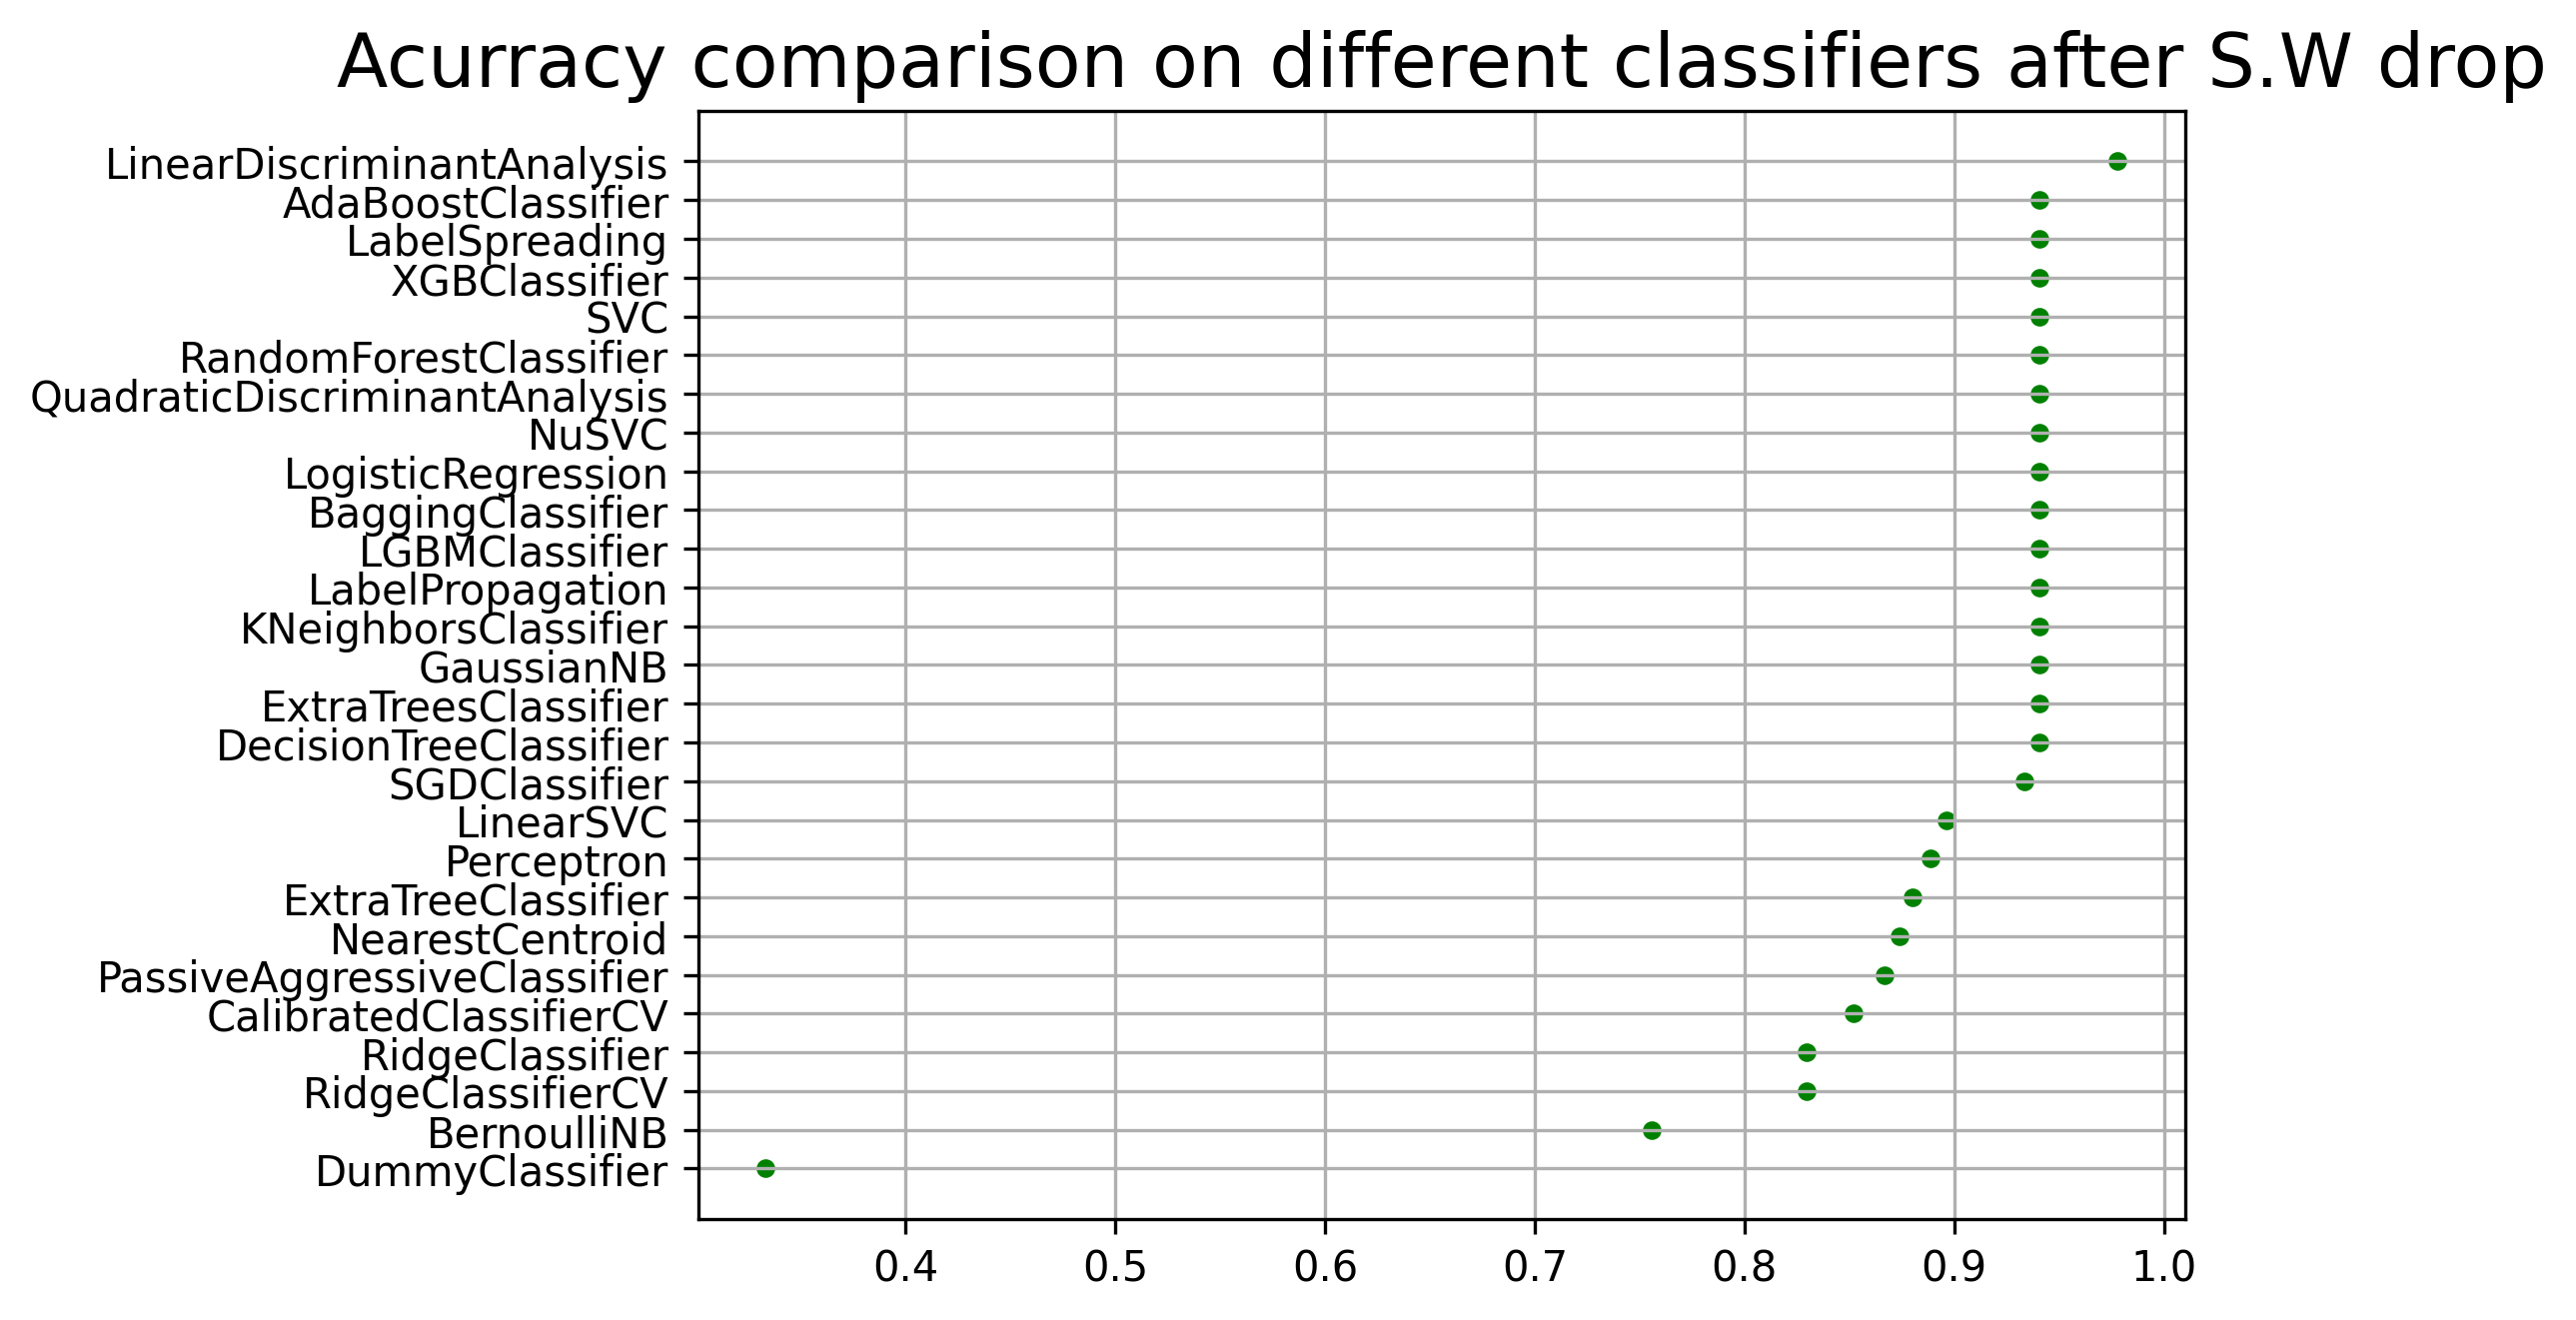

In [21]:
#plotting a graph for automatic classifier choosing for the initial dataset

plt.scatter(models_initial['Balanced Accuracy'].iloc[::-1], pd.Series(models_initial.index.values).iloc[::-1], s=12, c='green')
plt.grid()
plt.title('Acurracy comparison on different classifiers', size=18)
plt.savefig('images/acurracy_comparison_on_different_classifiers.png', bbox_inches='tight')

In [5]:
# model evaluating (LinearDiscriminantAnalysis chosen by L.P.) based on initial dataset

model = LinearDiscriminantAnalysis()
model.fit(train_data,train_labels)
arr_accuracies = np.array([])
for i in range(20):
    num_error = 0
    for i in range(10000):
        random_num = random.randint(0, 111)
        if model.predict([iris_data[random_num]]) != data_iris.target[random_num]:
            num_error += 1
    acc = (100-(num_error/100))/100
    arr_accuracies = np.append(arr_accuracies,acc) 
    
arr_accuracies.mean()

0.9817849999999998

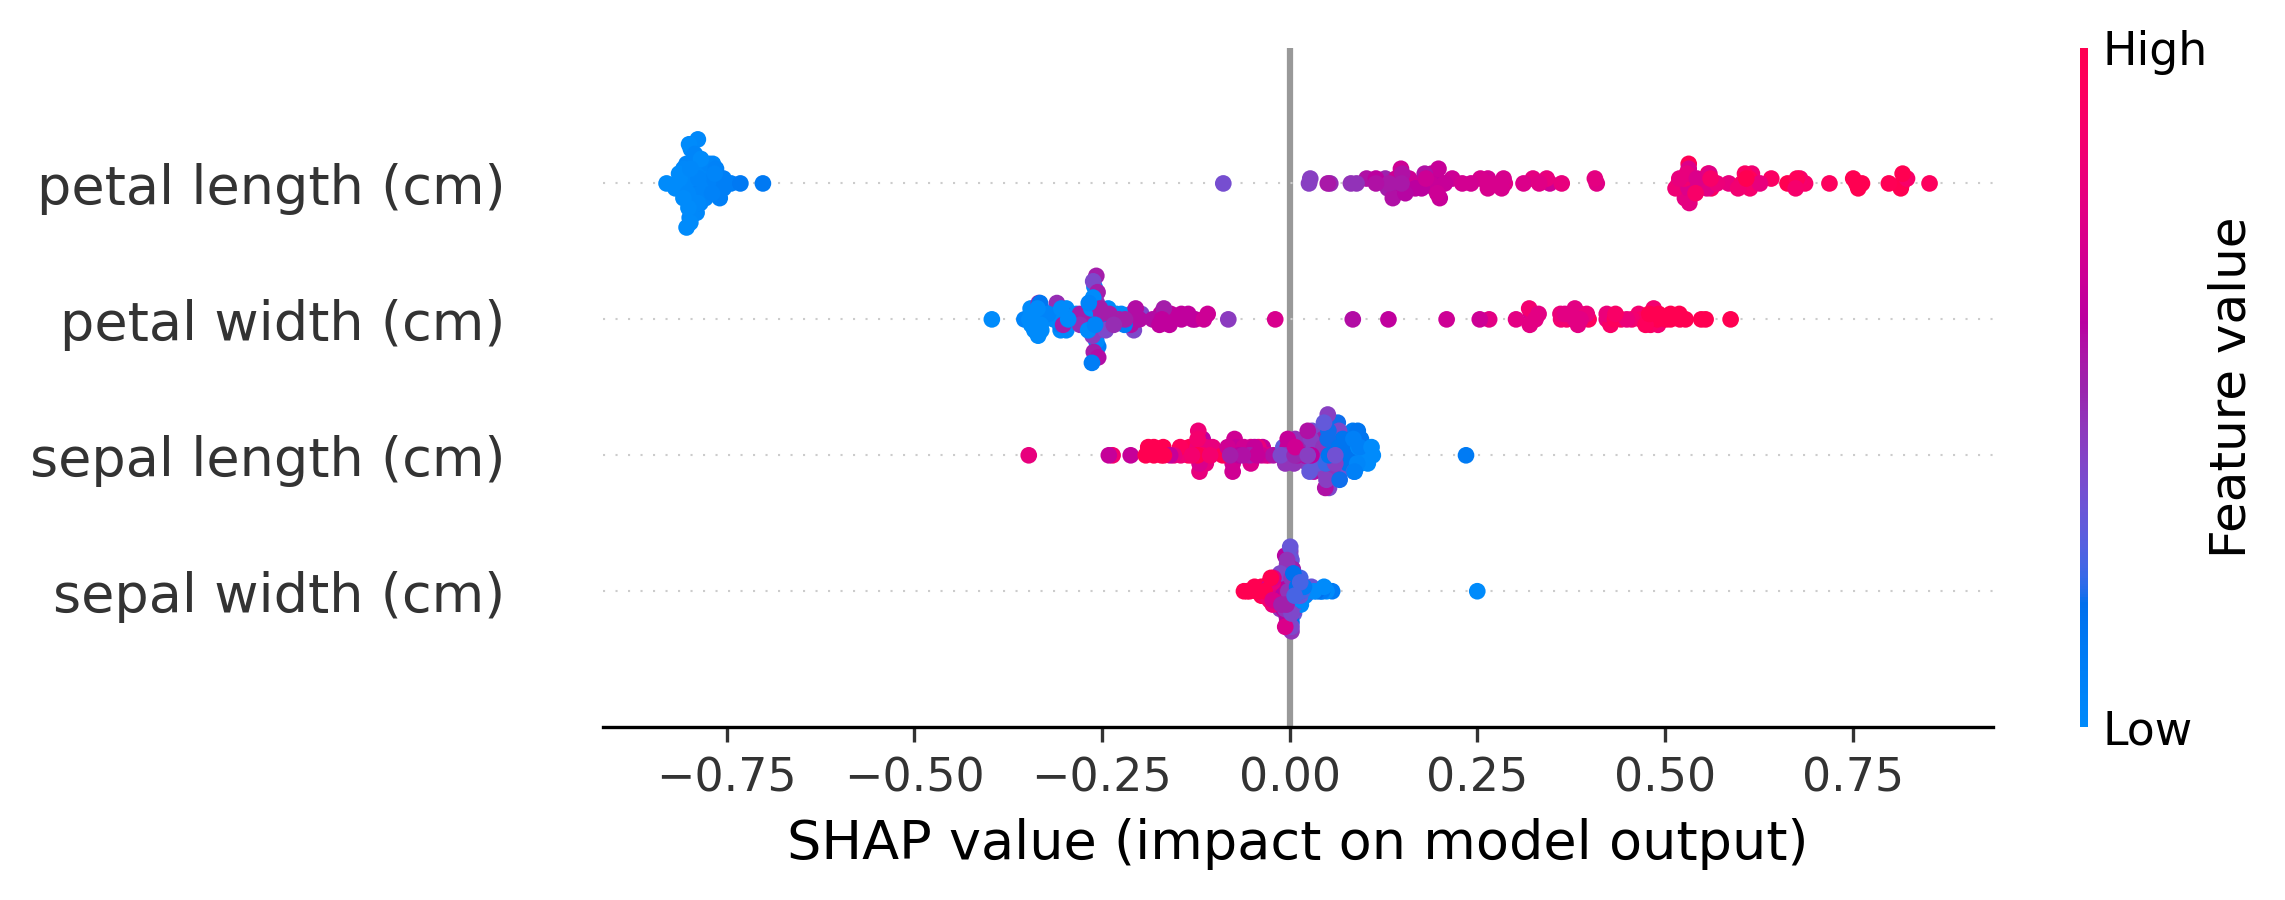

In [6]:
# compute the SHAP values for the initial dataset

df_iris_data = pd.DataFrame(iris_data, columns = data_iris.feature_names)
explainer = shap.Explainer(model.predict, df_iris_data)
shap_values_initial = explainer(df_iris_data)
# shap.plots.waterfall(shap_values[10], show=False)
# shap.plots.bar(shap_values[10], show=False)
shap.summary_plot(shap_values_initial, show=False)
plt.savefig('images/shap_values_initial.png', bbox_inches='tight')

In [8]:
# automatic classifier chooser after dropping a feature (sepal width)
# features go in next order: 0:sepal_length 1:sepal_width 2:petal_length 3:petal_width 

iris_data_sw_dropped = iris_data[:, [0, 2, 3]] # sw means sepal width - the least valuable feature 
train_data_sw_dropped, test_data_sw_dropped, train_labels, test_labels = train_test_split(iris_data_sw_dropped,
                                                                    iris_target,
                                                                    random_state=1488
                                                                   )
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models_sw_dropped, predictions = clf.fit(train_data_sw_dropped, test_data_sw_dropped, train_labels, test_labels)
models_sw_dropped
models_sw_dropped['Balanced Accuracy'].mean()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


0.8858122672937486

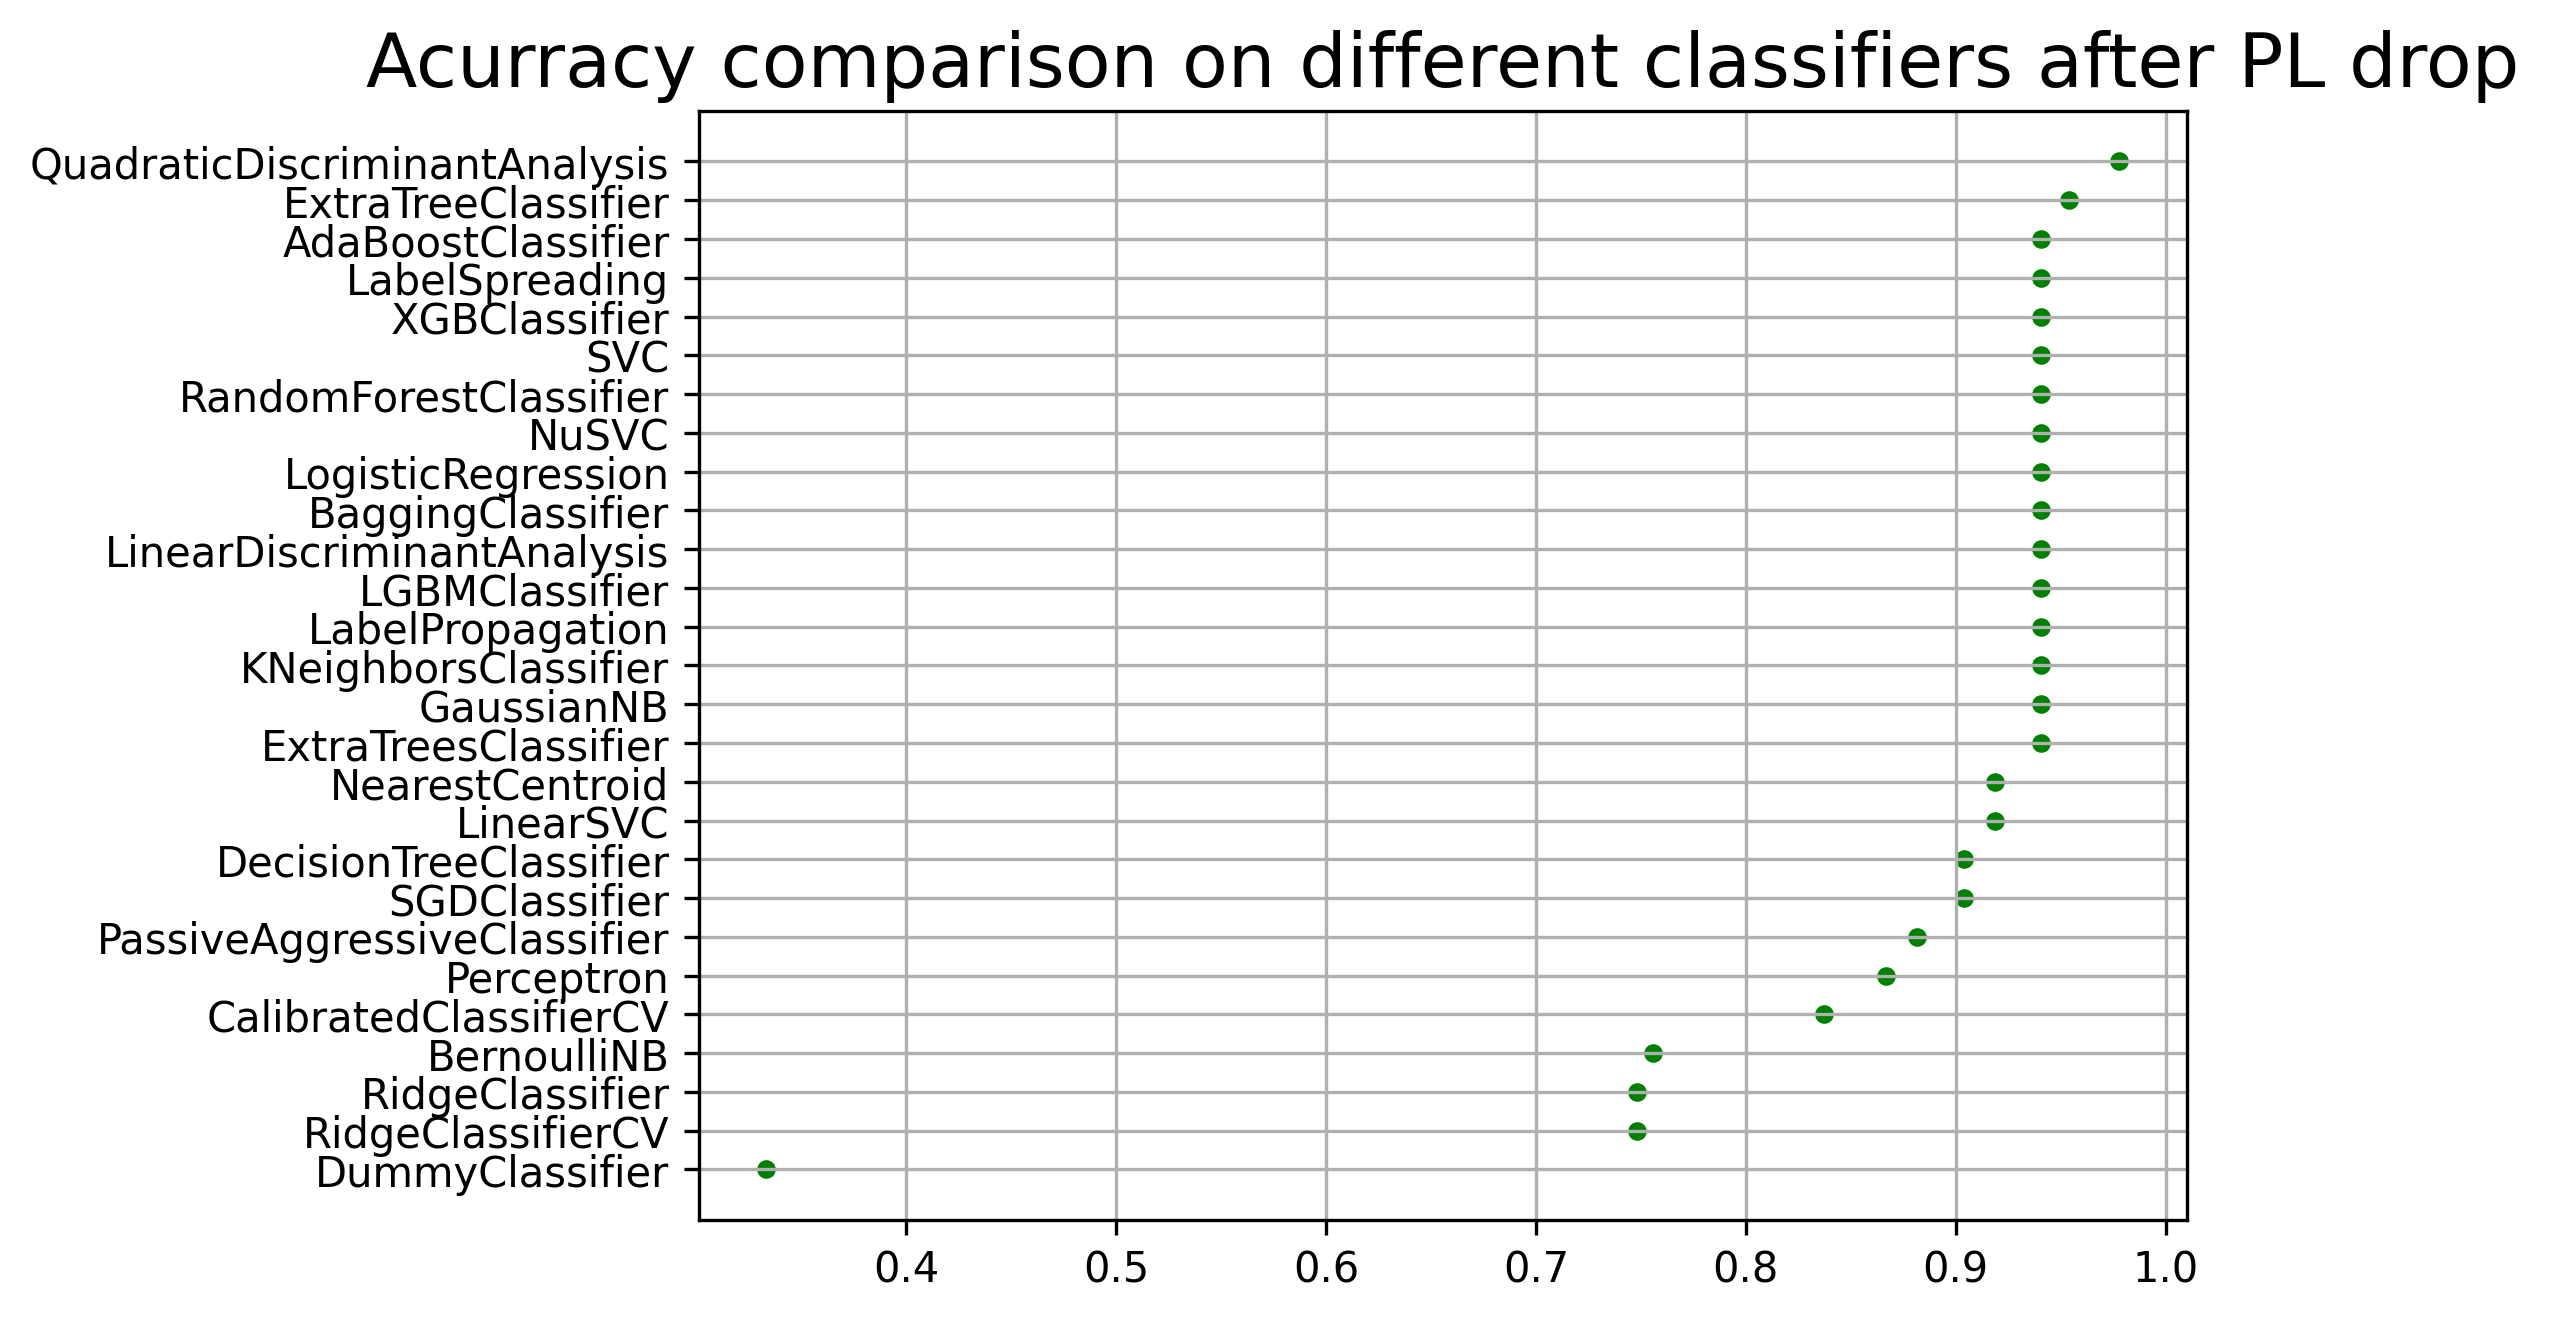

In [22]:
#plotting a graph for classifier chooser after dropping a feature
plt.scatter(models_sw_dropped['Balanced Accuracy'].iloc[::-1], pd.Series(models_sw_dropped.index.values).iloc[::-1], s=12, c='green')
plt.grid()
plt.title('Acurracy comparison on different classifiers after S.W drop', size=18)
plt.savefig('images/acurracy_comparison_on_different_classifiers_pl_dropped.png', bbox_inches='tight')

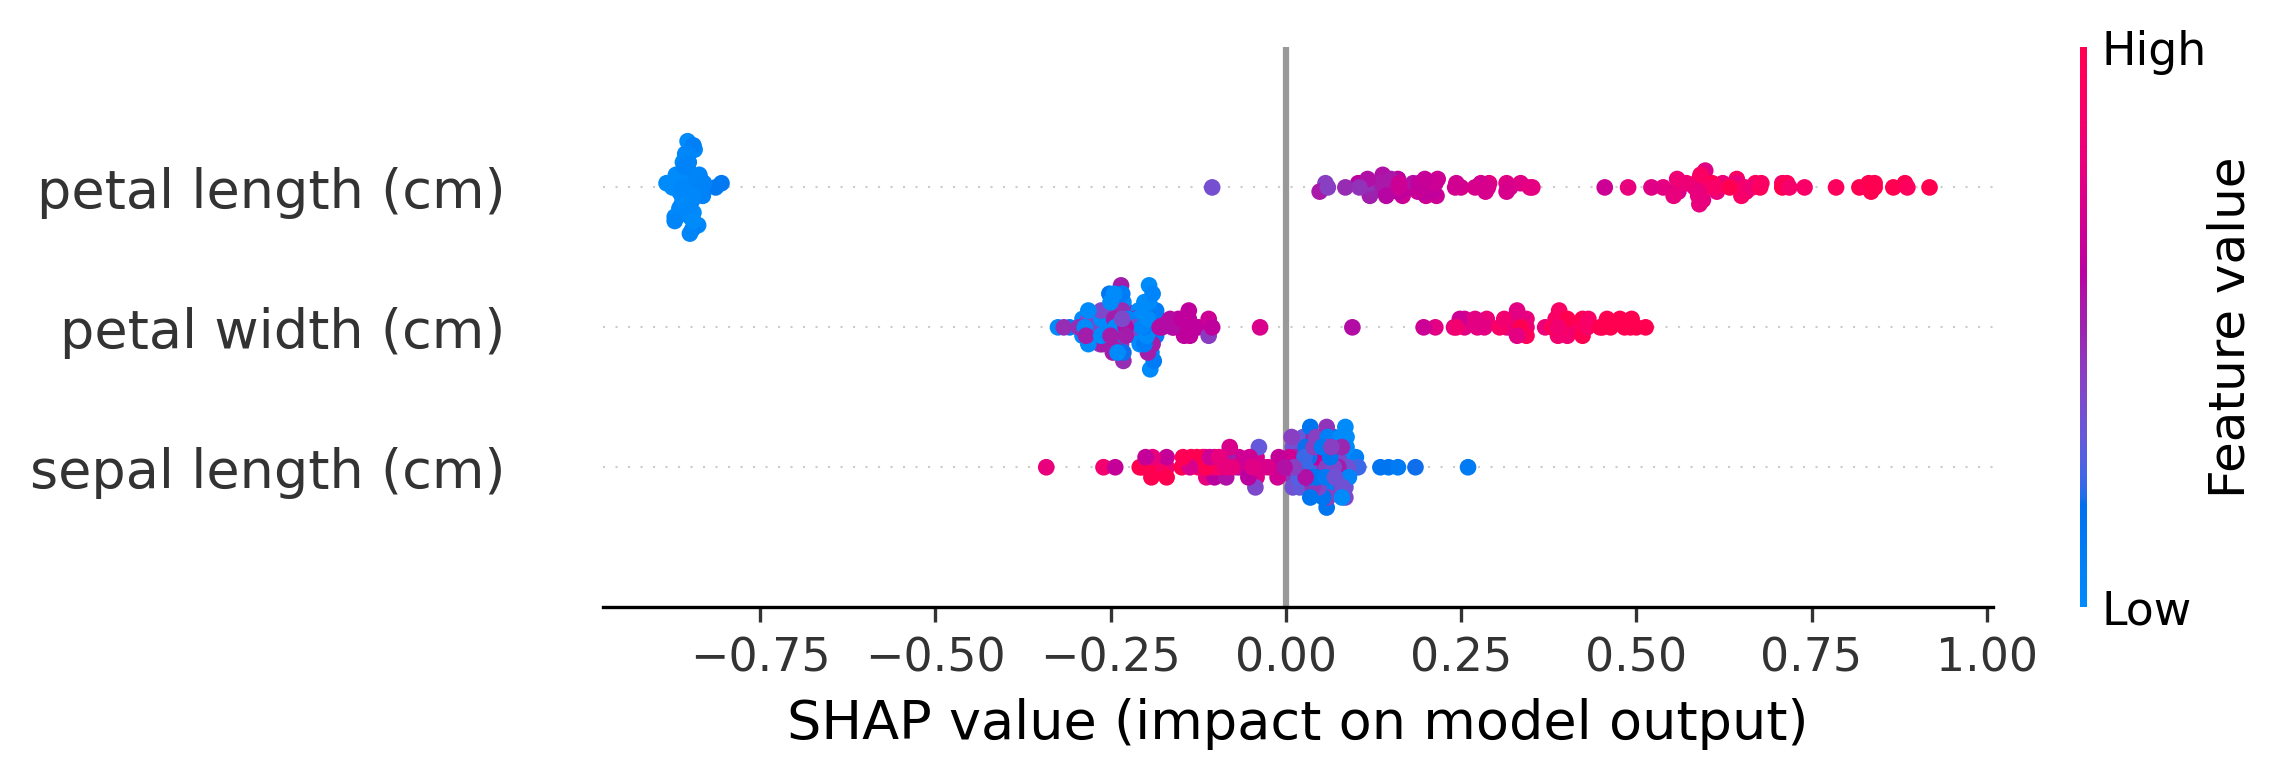

In [15]:
# update our model to 3 dimensions after feature sw drop

model_sw_dropped = LinearDiscriminantAnalysis()
model_sw_dropped.fit(train_data_sw_dropped,train_labels)

# compute a SHAP values for the new model 

df_iris_data_sw_dropped = pd.DataFrame(iris_data_sw_dropped, columns = np.array(data_iris.feature_names)[[0, 2, 3]])
explainer = shap.Explainer(model_sw_dropped.predict, df_iris_data_sw_dropped)
shap_values = explainer(df_iris_data_sw_dropped)
# shap.plots.waterfall(shap_values[10], show=False)
# shap.plots.bar(shap_values, show=False)
shap.summary_plot(shap_values, show=False)
plt.savefig('images/shap_values_sw_dropped.png', bbox_inches='tight')

In [17]:
# automatic classifier chooser after dropping a feature (petal length)

iris_data_pl_dropped = iris_data[:, [0, 1, 3]] # pl means petal length - the most valuable feature 
train_data_pl_dropped, test_data_pl_dropped, train_labels, test_labels = train_test_split(iris_data_pl_dropped,
                                                                    iris_target,
                                                                    random_state=1488
                                                                   )
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models_pl_dropped, predictions = clf.fit(train_data_pl_dropped, test_data_pl_dropped, train_labels, test_labels)
models_pl_dropped
models_pl_dropped['Balanced Accuracy'].mean()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


0.8600823045267489

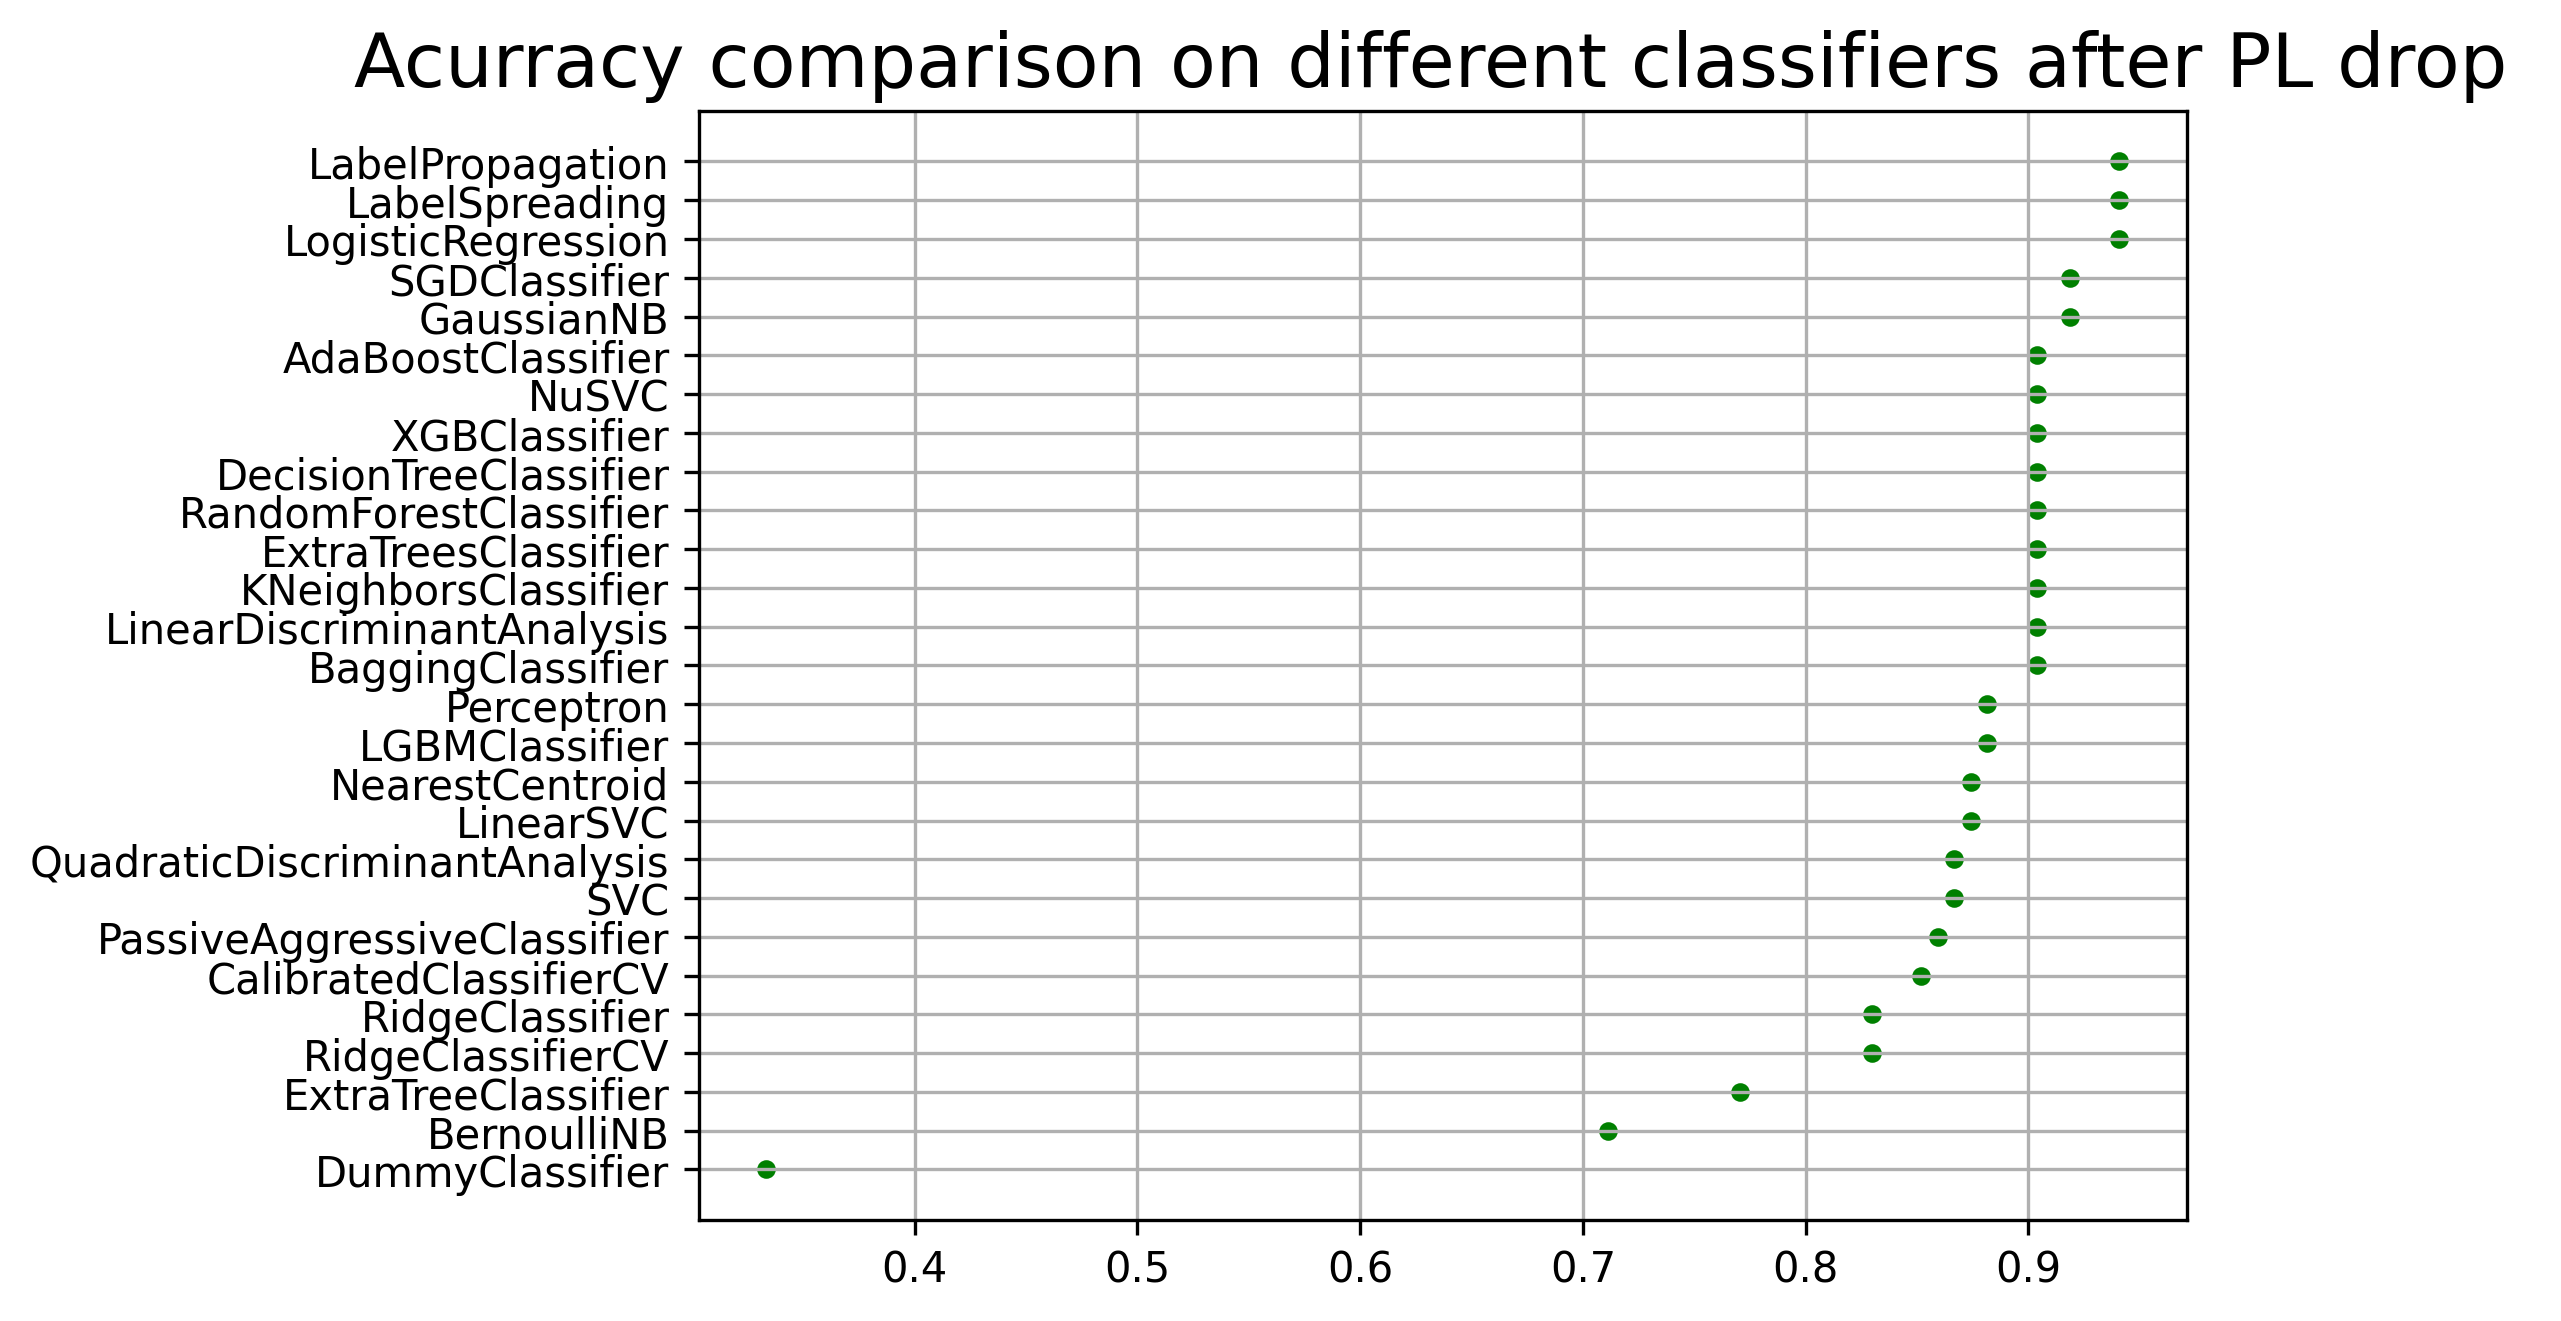

In [23]:
#plotting a graph
plt.scatter(models_pl_dropped['Balanced Accuracy'].iloc[::-1], pd.Series(models_pl_dropped.index.values).iloc[::-1], s=12, c='green')
plt.grid()
plt.title('Acurracy comparison on different classifiers after PL drop ', size=18)
plt.savefig('images/acurracy_comparison_on_different_classifiers_pl_dropped.png', bbox_inches='tight')

In [25]:
# automatic classifier chooser after PCA

pca = PCA(n_components=3)
pca.fit(iris_data)
iris_data_pca = pca.transform(iris_data)


train_data_pca, test_data_pca, train_labels, test_labels = train_test_split(iris_data_pca,
                                                                    iris_target,
                                                                    random_state=1488
                                                                   )
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(train_data_pca, test_data_pca, train_labels, test_labels)
models['Balanced Accuracy'].mean()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.85it/s]


0.8506956692141877

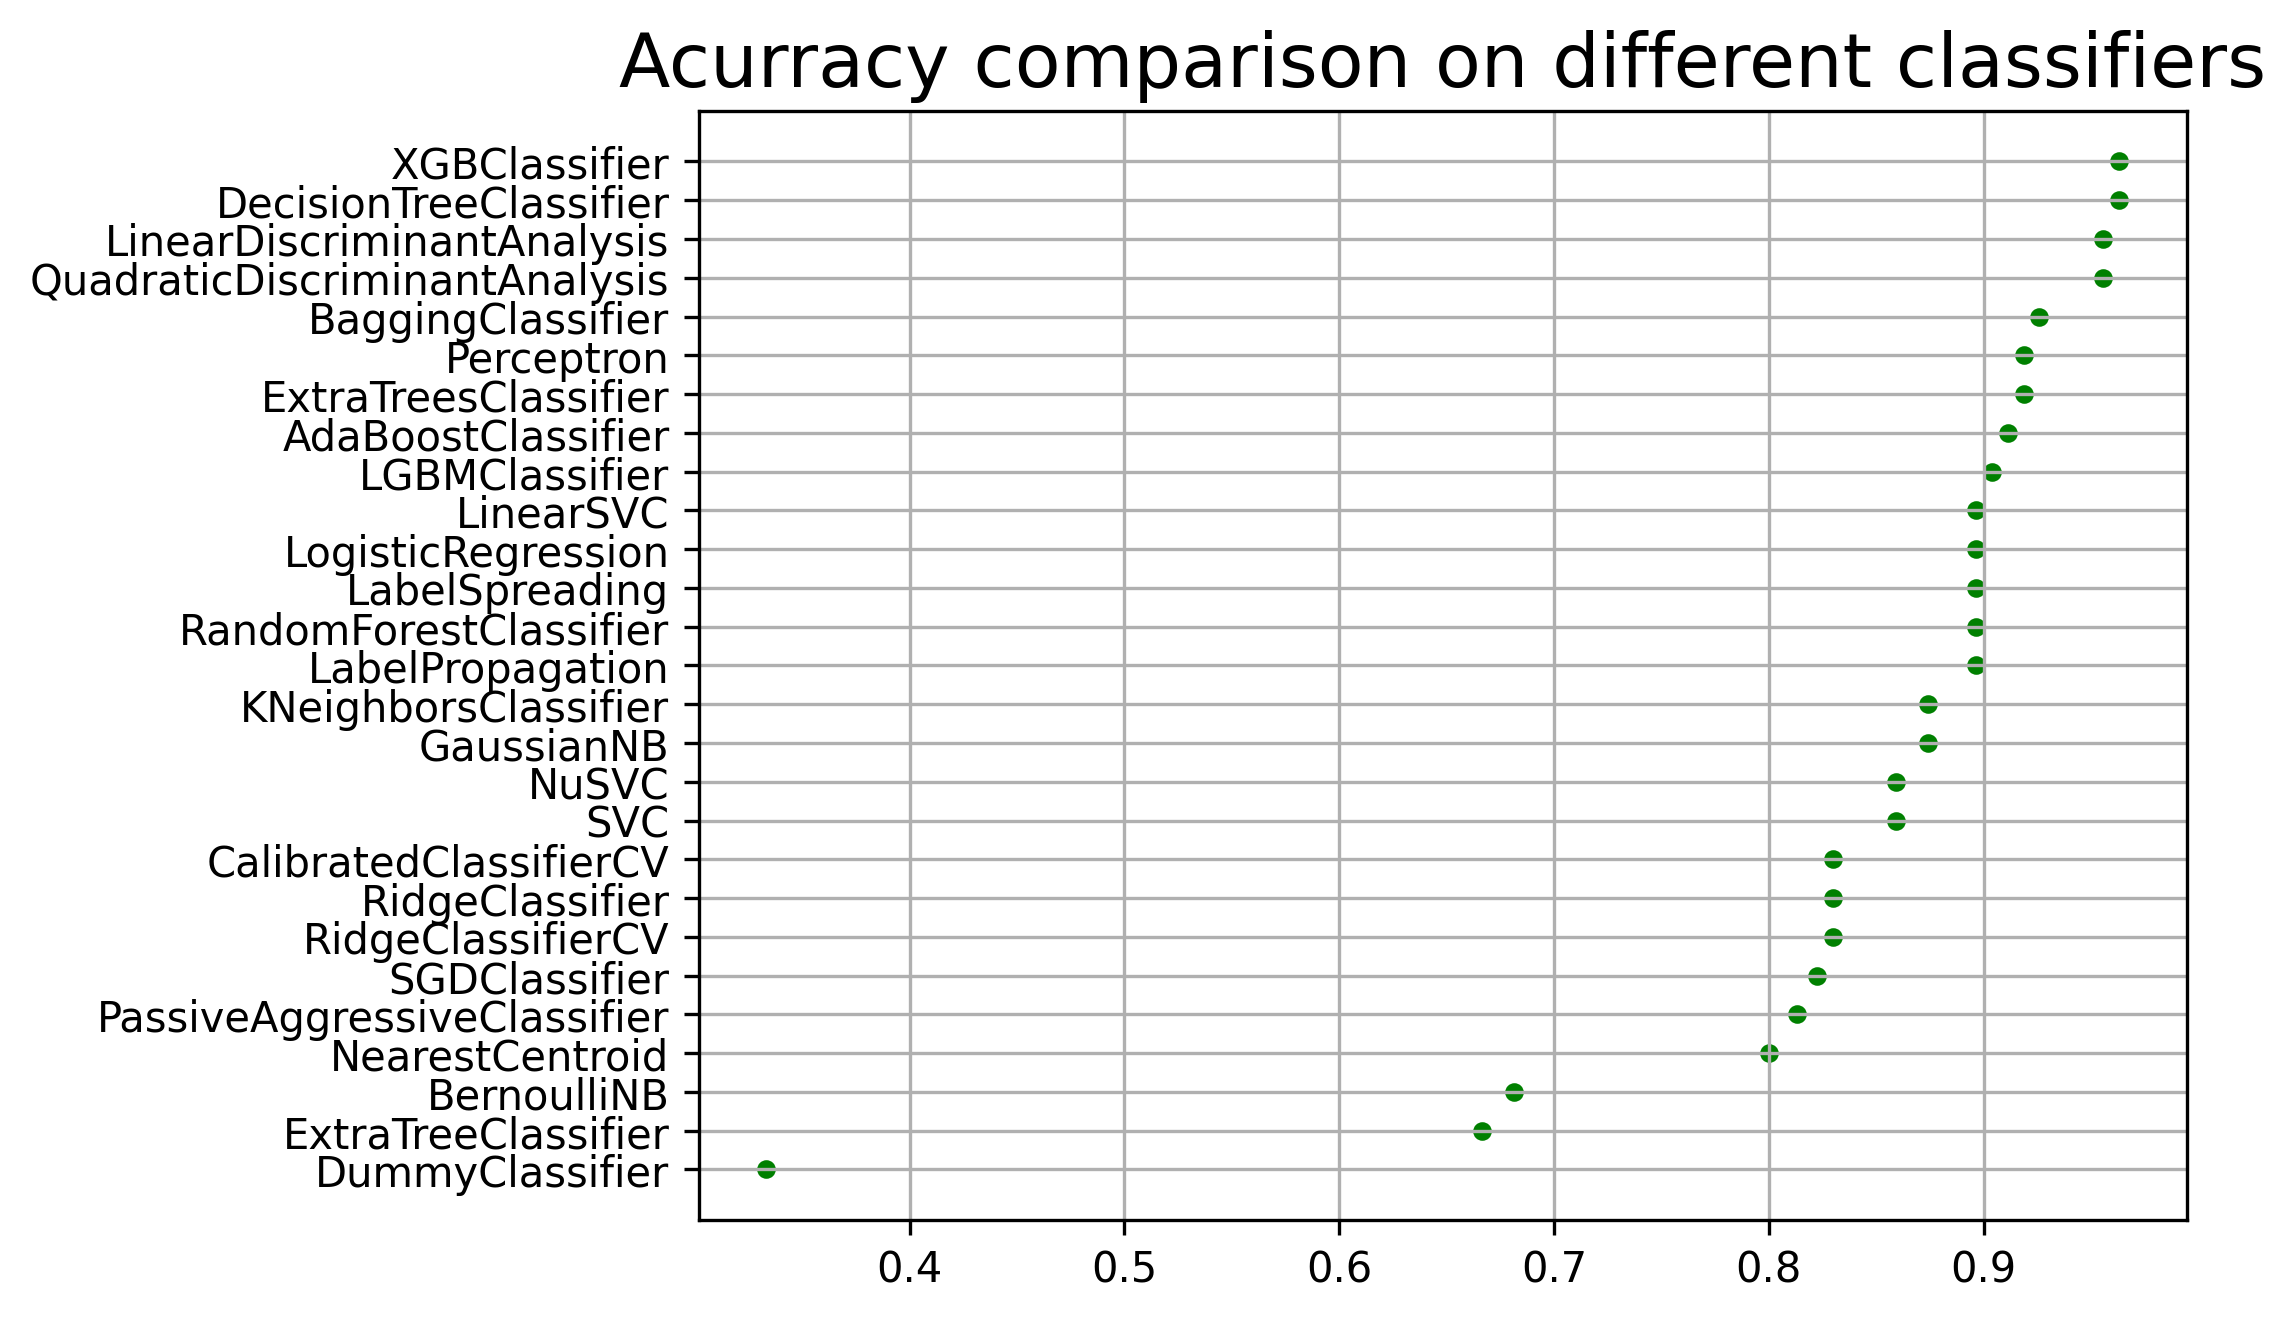

In [26]:
#plotting a graph for automatic classifier chooser after PCA

plt.scatter(models['Balanced Accuracy'].iloc[::-1], pd.Series(models.index.values).iloc[::-1], s=12, c='green')
plt.grid()
plt.title('Acurracy comparison on different classifiers', size=18)
plt.savefig('images/acurracy_comparison_on_different_classifiers_pca.png', bbox_inches='tight')

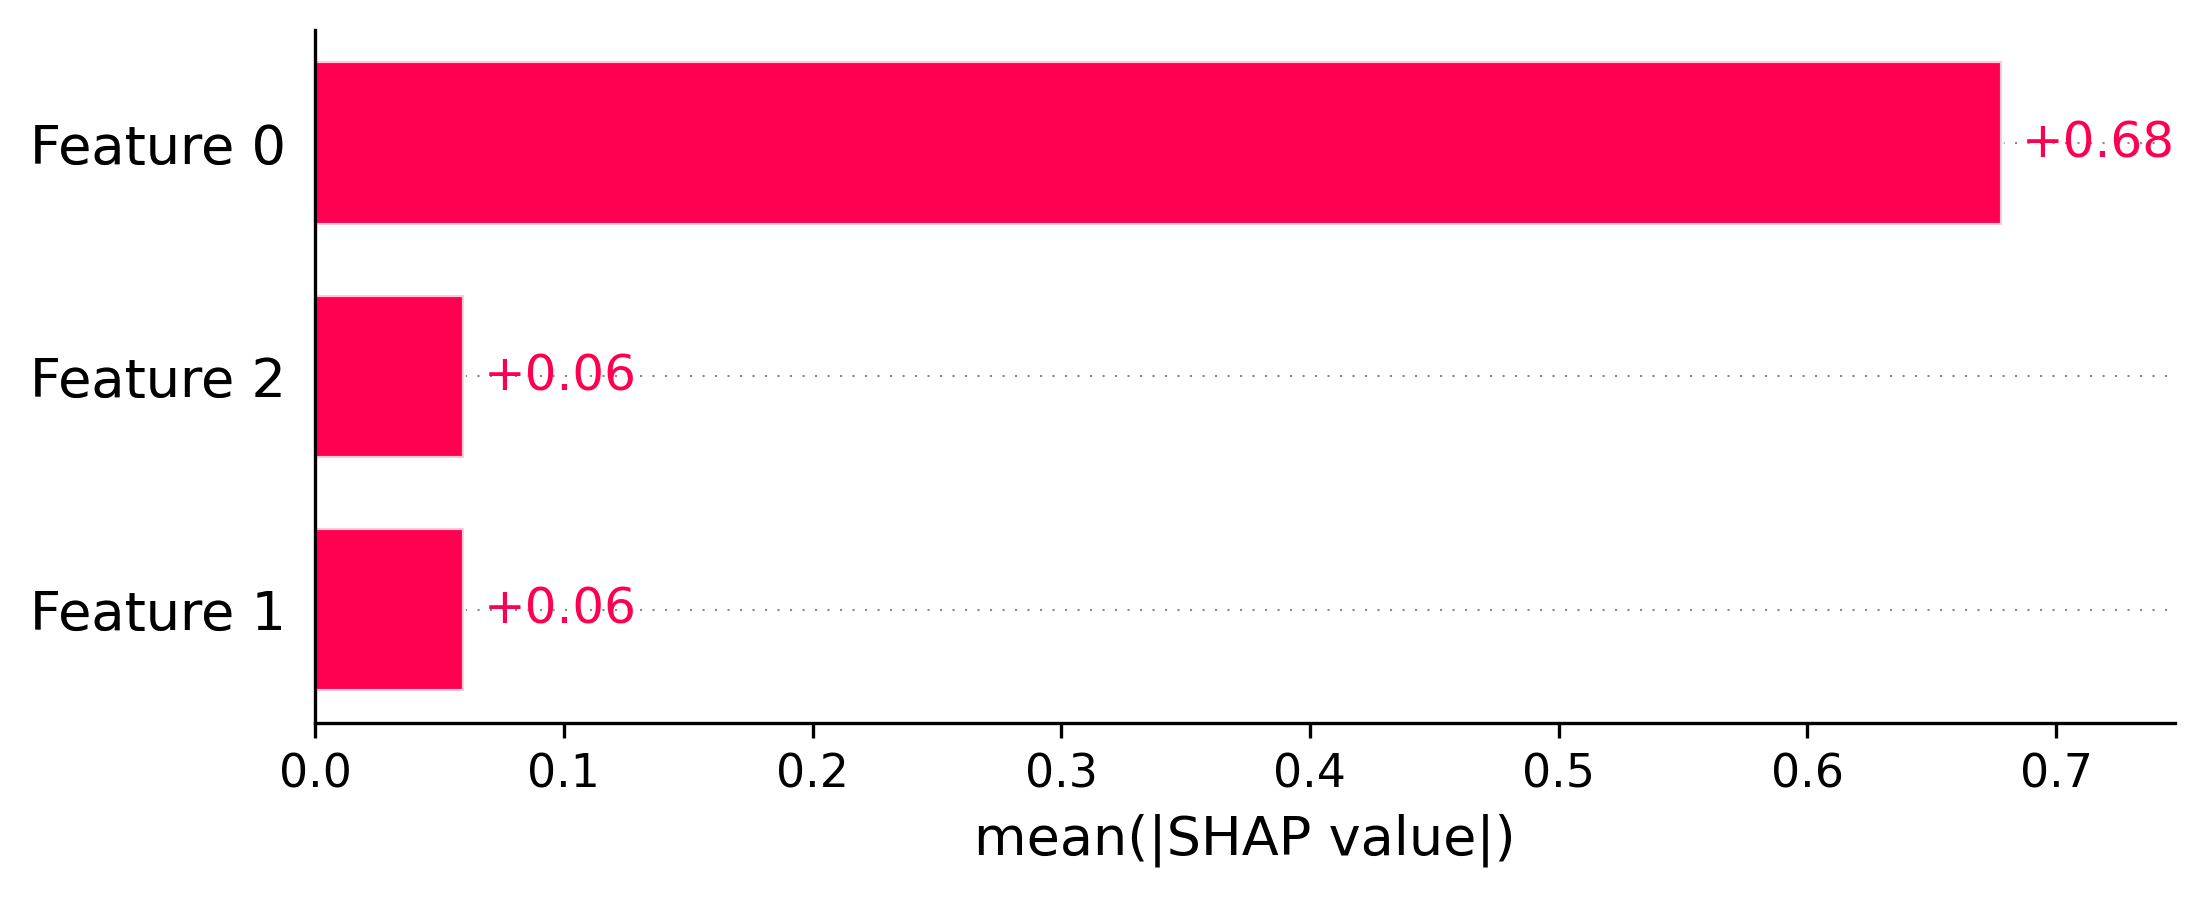

In [30]:
# compute the SHAP values for the new model

model_pca_3 = LinearDiscriminantAnalysis()
model_pca_3.fit(train_data_pca, train_labels)
explainer = shap.Explainer(model_pca_3.predict, iris_data_pca)
shap_values = explainer(iris_data_pca)
# shap.plots.waterfall(shap_values[10], show=False)
# plt.show()
shap.plots.bar(shap_values, show=False)
# plt.show()
# shap.summary_plot(shap_values, show=False)
plt.savefig('images/shap_values_pca_bar.png', bbox_inches='tight')